## 4. Guided Project: Visualizing Earnings Based On College Majors

Each row in the underlying dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")

In [3]:
# Use DataFrame.iloc[] to return the first row formatted as a table.
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
# Use DataFrame.head() and DataFrame.tail() to become familiar with how the data is structured.
print(recent_grads.head())
print(recent_grads.tail())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  ...  \
0   2057.0    282.0    Engineering    0.120564           36      1976  ...   
1    679.0     77.0    Engineering    0.101852            7       640  ...   
2    725.0    131.0    Engineering    0.153037            3       648  ...   
3   1123.0    135.0    Engineering    0.107313           16       758  ...   
4  21239.0  11021.0    Engineering    0.341631          289     25694  ...   

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
0  

In [5]:
# Use DataFrame.describe() to generate summary statistics for all of the numeric columns.
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


# Drop rows with missing values

In [6]:
#Look up the number of rows in recent_grads and assign the value to raw_data_count.
raw_data_count = recent_grads.shape[0]

In [7]:
#Identify missing values in the dataframe

print(recent_grads.isnull().sum())

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64


In [8]:
# Use DataFrame.dropna() to drop rows containing missing values and 
# assign the resulting DataFrame back to recent_grads.

recent_grads = recent_grads.dropna()

In [9]:
# Look up the number of rows in recent_grads now and assign the value to cleaned_data_count.

cleaned_data_count = recent_grads.shape[0]
print(raw_data_count - cleaned_data_count)

1


Observation: Only one row contained missing values

# Scatter plots

Text(0.5, 1.0, 'Sample_size vs. Median')

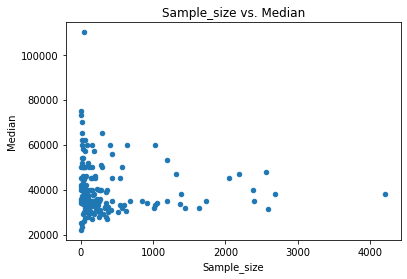

In [10]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Sample_size vs. Median')

Question: Do students in more popular majors make more money?
Answer: No, it seems to be rather the other way around. The first couple majors with the highest median income are not very popular with regards to the total amount of people obtaining them.

Text(0.5, 1.0, 'Sample_size vs. Unemployment_rate')

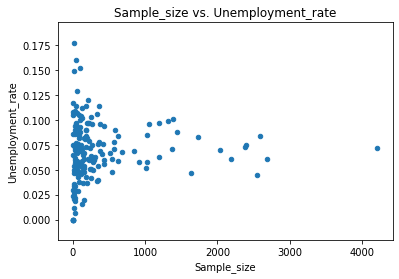

In [11]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Sample_size vs. Unemployment_rate')

Text(0.5, 1.0, 'Full_time vs. Median')

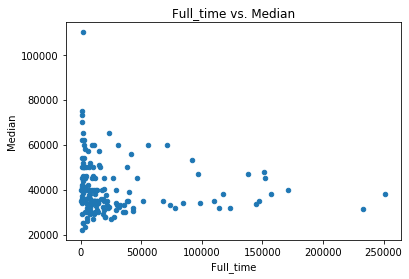

In [12]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Full_time vs. Median')

Question: Is there any link between the number of full-time employees and median salary?
Answer: Not if you compare the absolute number of people with the median income. We should rather use the proportion of people with a certain majo working full time for this purpose.

Text(0.5, 1.0, 'ShareWomen vs. Unemployment_rate')

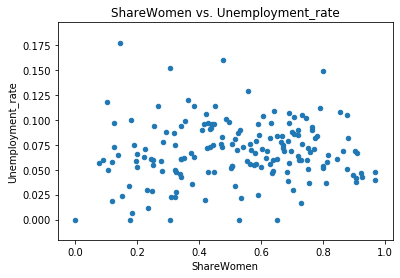

In [13]:
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax.set_title('ShareWomen vs. Unemployment_rate')

Text(0.5, 1.0, 'Women vs. Median')

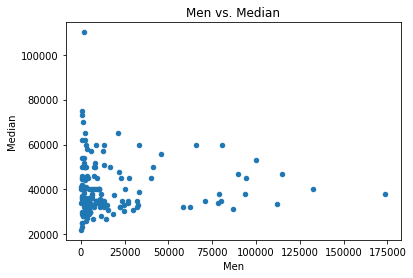

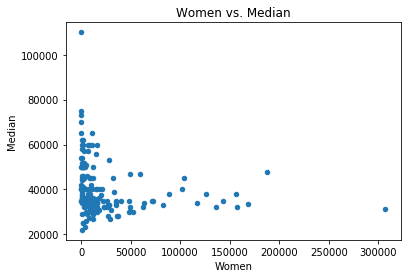

In [14]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Men vs. Median')

ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Women vs. Median')

Question: Do students that majored in subjects that were majority female make more money?
Answer: We can not provide a solid answer, because the statistic doesn't show us whether women have ben the majority in a cetain major.

# Histograms

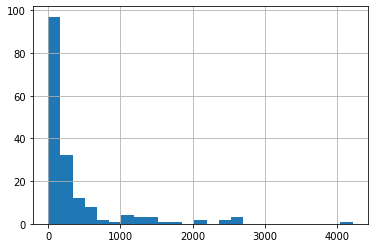

In [15]:
recent_grads['Sample_size'].hist(bins=25)

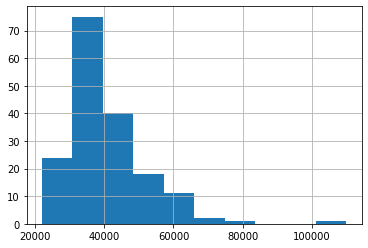

In [24]:
recent_grads['Median'].hist(bins=10)

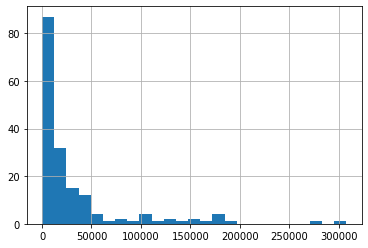

In [17]:
recent_grads['Employed'].hist(bins=25)

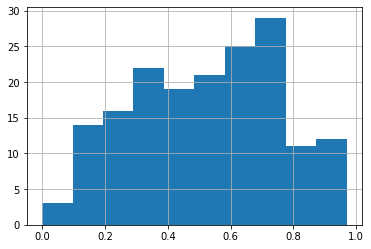

In [18]:
recent_grads['ShareWomen'].hist(bins=10)

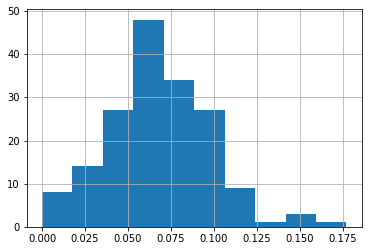

In [19]:
recent_grads['Unemployment_rate'].hist(bins=10)

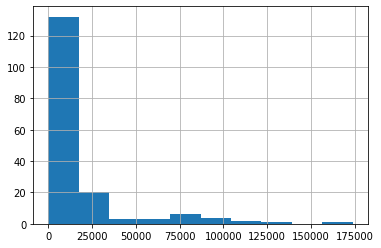

In [20]:
recent_grads['Men'].hist(bins=10)

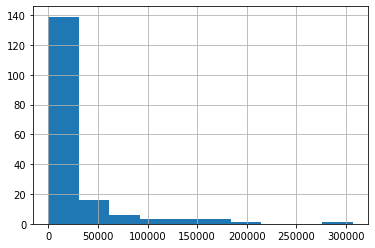

In [21]:
recent_grads['Women'].hist(bins=10)

Alternative way of generating the histograms

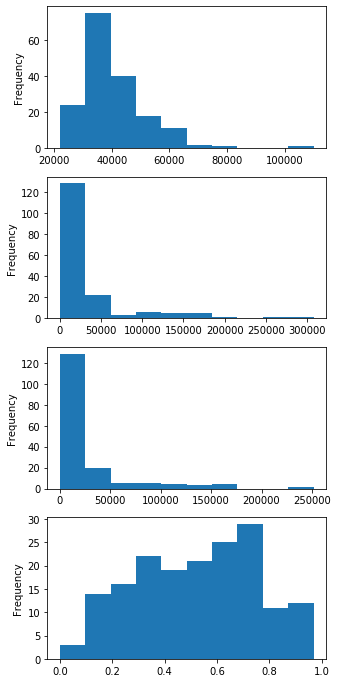

In [22]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    ax = recent_grads[cols[r]].plot(kind='hist')

# Scatter matrix plot

In [26]:
from pandas.plotting import scatter_matrix 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118420490>,
      dtype=object)

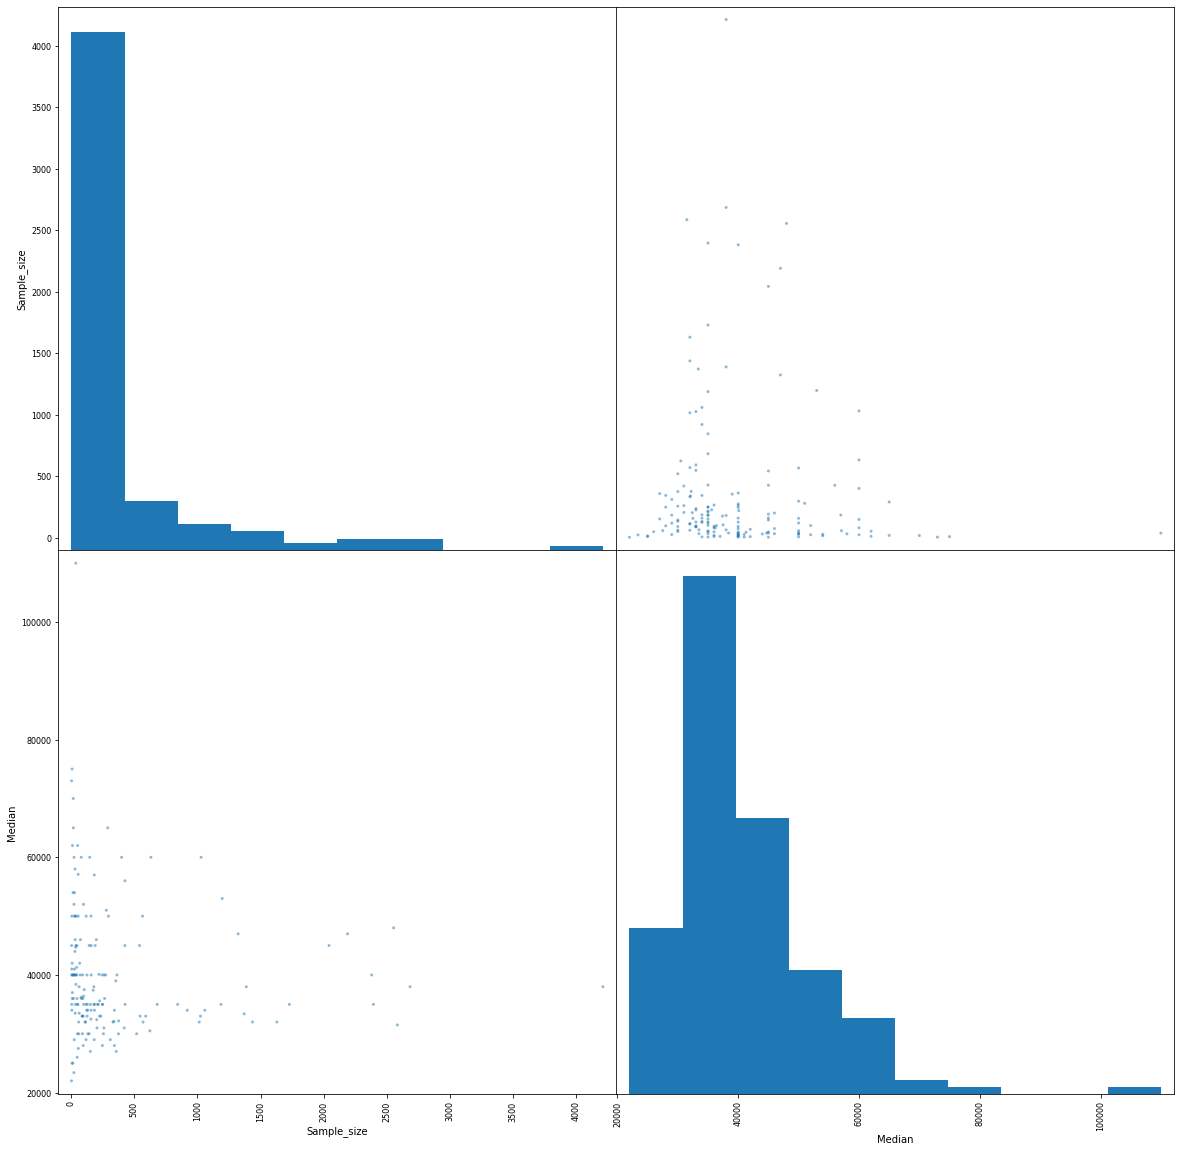

In [28]:
# Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118909e90>,
      dtype=object)

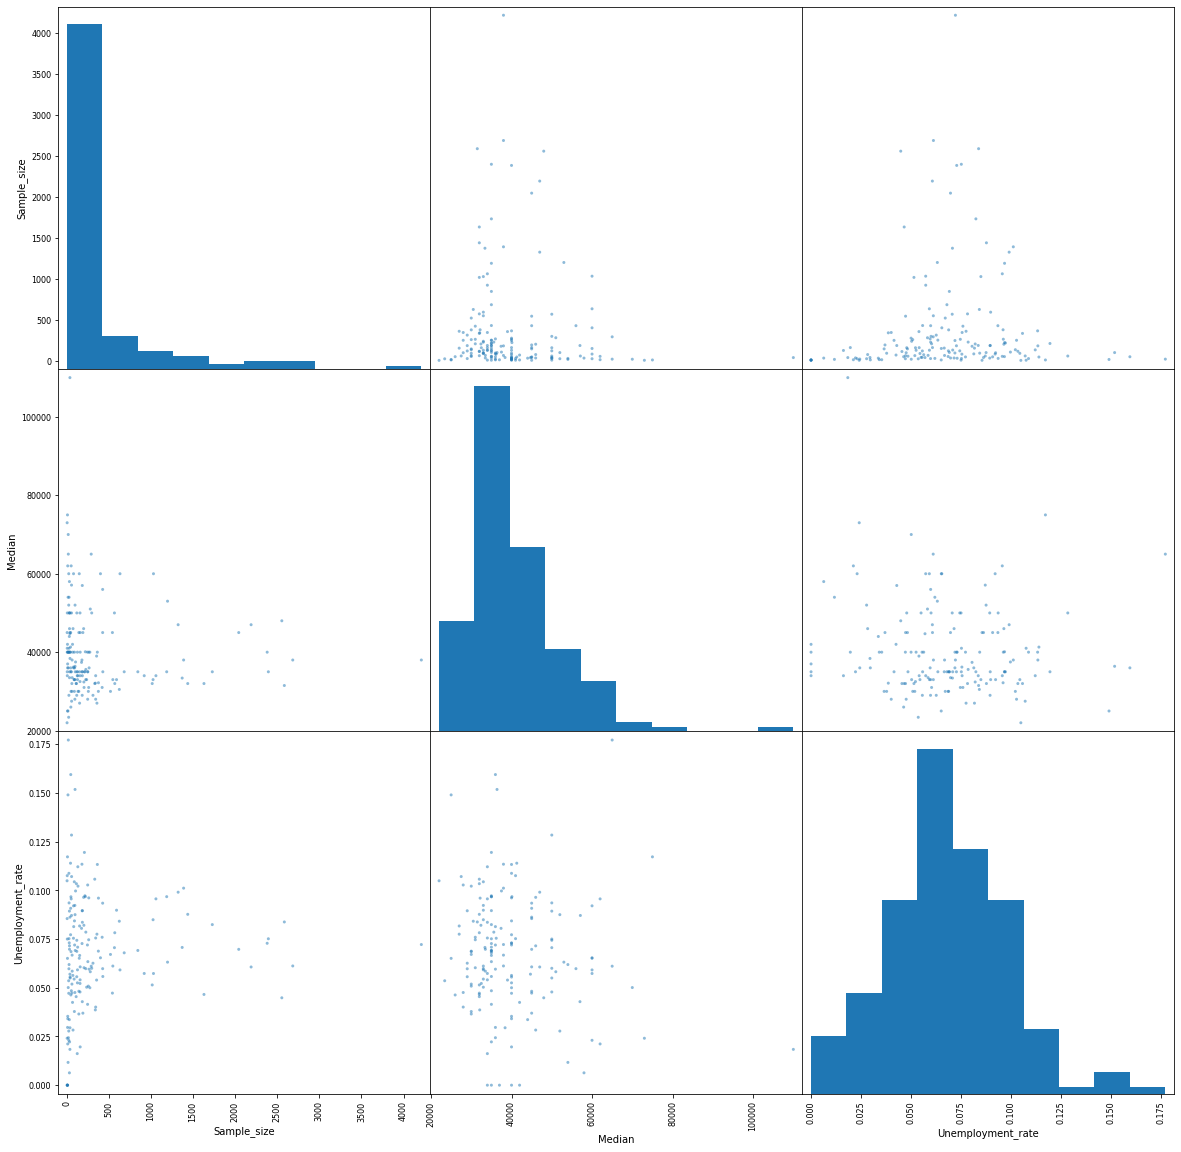

In [29]:
scatter_matrix(recent_grads[['Sample_size', 'Median', "Unemployment_rate"]], figsize=(20,20))

# Bar plots

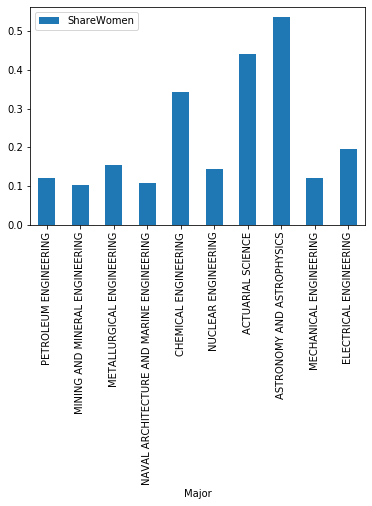

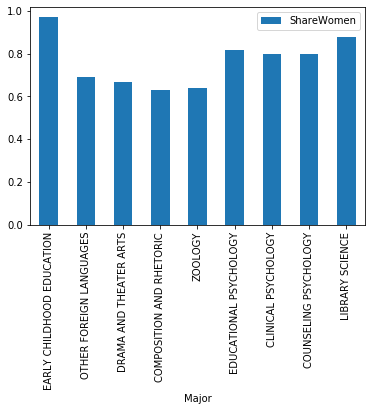

In [34]:
# Use bar plots to compare the percentages of women (ShareWomen) 
# from the first ten rows and last ten rows of the recent_grads dataframe.

recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
recent_grads[163:].plot.bar(x='Major', y='ShareWomen')

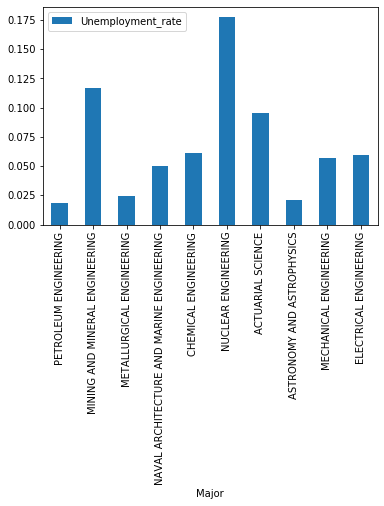

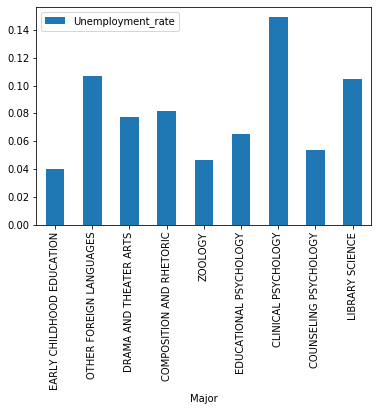

In [35]:
# Use bar plots to compare the unemployment rate (Unemployment_rate) 
# from the first ten rows and last ten rows of the recent_grads dataframe.

recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate')